In [91]:
import pandas as pd
import numpy as np
! pip install openpyxl

In [92]:
costeiros = pd.read_excel('costeiros_441.xlsx')

In [93]:
san_rs = pd.read_excel('snis_base.xlsx')

In [94]:
san_rs = san_rs[san_rs['ibge6'].isin(costeiros['ibge6'])]

In [95]:
san_rs.shape

(443, 183)

In [96]:
san_rs.reset_index(drop=True, inplace=True)

san_rs.head()

,ibge6,Município,Estado,Ano de Referência,Prestadores,Serviços,G06A - População urbana residente do(s) município(s) com abastecimento de água,G06B - População urbana residente do(s) município(s) com esgotamento sanitário,"G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE","G12B - População total residente do(s) município(s) com esgotamento sanitário, segundo o IBGE",...,IN032_RS - Massa recuperada per capita de materiais recicláveis (exceto matéria orgânica e rejeitos) em relação à população urbana,IN033_RS - Taxa de material recolhido pela coleta seletiva (exceto matéria orgânica) em relação à quantidade total coletada de resíduos sólidos domésticos,IN034_RS - Incidência de papel e papelão no total de material recuperado,IN035_RS - Incidência de plásticos no total de material recuperado,IN038_RS - Incidência de metais no total de material recuperado,IN039_RS - Incidência de vidros no total de material recuperado,"IN040_RS - Incidência de outros materiais (exceto papel, plástico, metais e vidros) no total de material recuperado",IN053_RS - Taxa de material recolhido pela coleta seletiva (exceto mat. orgânica) em relação à quantidade total coletada de resíduos sól. domésticos,IN054_RS - Massa per capita de materiais recicláveis recolhidos via coleta seletiva,Column1
0,270040,Atalaia,AL,2018,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,270050,Barra de Santo Antônio,AL,2018,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,270060,Barra de São Miguel,AL,2018,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,7115.0,7115.0,8264.0,8264.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,270220,Coqueiro Seco,AL,2018,[27043000] Companhia de Saneamento de Alagoas ...,Água,5243.0,NaN,5826.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,270230,Coruripe,AL,2018,[27023011] Prefeitura Municipal de Coruripe - ...,Água e Esgoto | Res. Sólidos,49957.0,49957.0,56562.0,56562.0,...,1.0,NaN,16.0,40.0,4.0,0.0,40.0,NaN,NaN,NaN


In [97]:
turismo = pd.read_csv('turismo.csv', index_col=0)

In [98]:
turismo = turismo[turismo['COD_IBGE'].isin(san_rs['ibge6'])]

In [99]:
turismo.shape

(344, 11)

In [100]:
san_rs = san_rs.sort_values('ibge6')

In [101]:
turismo.rename(columns={'COD_IBGE':'ibge6'}, inplace=True)

In [102]:
turismo = turismo.sort_values('ibge6')

In [103]:
df_total = pd.merge(san_rs, turismo, how='outer', on='ibge6')

In [104]:
df_total.head()

,ibge6,Município,Estado,Ano de Referência,Prestadores,Serviços,G06A - População urbana residente do(s) município(s) com abastecimento de água,G06B - População urbana residente do(s) município(s) com esgotamento sanitário,"G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE","G12B - População total residente do(s) município(s) com esgotamento sanitário, segundo o IBGE",...,MACRO,UF,REGIAO_TURISTICA,MUNICIPIO,QUANTIDADE_EMPREGOS,QUANTIDADE_ ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL,ARRECADACAO,CLUSTER
0,150010,Abaetetuba,PA,2018,[15014000] Companhia de Saneamento do Pará - C...,Água | Res. Sólidos,91934.0,NaN,156292.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150030,Afuá,PA,2018,[15014000] Companhia de Saneamento do Pará - C...,Água | Res. Sólidos,10511.0,NaN,38863.0,NaN,...,Norte,PA,Região Turística das Florestas do Marajó,Afuá,0.0,0.0,0.0,42336.0,0.0,D
2,150070,Anajás,PA,2018,[15014000] Companhia de Saneamento do Pará - C...,Água,11066.0,NaN,28859.0,NaN,...,Norte,PA,Região Turística das Florestas do Marajó,Anajás,0.0,0.0,113.0,4742.0,0.0,D
3,150080,Ananindeua,PA,2018,[15014000] Companhia de Saneamento do Pará - C...,Água e Esgoto | Res. Sólidos,524273.0,524273.0,525566.0,525566.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,150090,Augusto Corrêa,PA,2018,[15014000] Companhia de Saneamento do Pará - C...,Água | Res. Sólidos,20501.0,NaN,45516.0,NaN,...,Norte,PA,Região Turística Amazônia Atlântica Caeté,Augusto Corrêa,0.0,0.0,0.0,326.0,0.0,D


In [105]:
df_total.shape

(443, 193)

In [17]:
df_total.to_excel('costeiros_final_441.xlsx')

In [18]:
coo = pd.read_excel('coordenadas_ibge6.xlsx')

In [19]:
coo = coo[coo['ibge6'].isin(df_total['ibge6'])]

In [20]:
coo.shape

(441, 5)

In [21]:
coo_not = df_total[~df_total['ibge6'].isin(coo['ibge6'])]

In [22]:
coo_not.shape

(2, 193)

In [23]:
coo_not.head()

,ibge6,Município,Estado,Ano de Referência,Prestadores,Serviços,G06A - População urbana residente do(s) município(s) com abastecimento de água,G06B - População urbana residente do(s) município(s) com esgotamento sanitário,"G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE","G12B - População total residente do(s) município(s) com esgotamento sanitário, segundo o IBGE",...,MACRO,UF,REGIAO_TURISTICA,MUNICIPIO,QUANTIDADE_EMPREGOS,QUANTIDADE_ ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL,ARRECADACAO,CLUSTER
393,421265,Pescaria Brava,SC,2018,[42054000] Companhia Catarinense de Águas e Sa...,Água | Res. Sólidos,7902.0,NaN,10022.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,422000,Balneário Rincão,SC,2018,[42200011] Prefeitura Municipal de Balneário R...,Água,11519.0,NaN,12570.0,NaN,...,Sul,SC,Encantos do Sul SC,Balneário Rincão,0.0,0.0,0.0,0.0,0.0,D


In [24]:
coo.to_excel('coordenadas_441.xlsx')

In [25]:
des = pd.read_excel('Fluxos_RS_2018.xlsx')

In [26]:
des.head()

,Código,Nome,UF,Ano,UndCod,Up001,Nome da Unidade,municipio_origem,Up080,Up007,Up008,Up009,Up010,Up067,Up011
0,520005,Abadia de Goiás,GO,2018,2264,Aterro Controlado,Aterro controlado,Abadia de Goiás/GO,6754.0,6520.0,22.0,0.0,212.0,0.0,0.0
1,310010,Abadia dos Dourados,MG,2018,3100104000,Aterro Controlado de Abadia dos Dourados,Aterro controlado,Abadia dos Dourados/MG,700.0,700.0,0.0,0.0,0.0,0.0,0.0
2,150010,Abaetetuba,PA,2018,1500104000,Aterro Controlado de Abaetetuba,Aterro controlado,Abaetetuba/PA,11904.0,11904.0,0.0,0.0,0.0,0.0,0.0
3,410010,Abatiá,PR,2018,6791,ATAR,Unidade de triagem (galpão ou usina),Abatiá/PR,200.0,200.0,NaN,NaN,NaN,NaN,NaN
4,410010,Abatiá,PR,2018,2802,Aterro Controlado de Abatiá,Lixão,Abatiá/PR,1210.0,1000.0,0.0,0.0,140.0,70.0,0.0


In [27]:
des[['município_origem','uf_origem']] = des['municipio_origem'].str.split("/", expand=True)

In [28]:
des.head()

,Código,Nome,UF,Ano,UndCod,Up001,Nome da Unidade,municipio_origem,Up080,Up007,Up008,Up009,Up010,Up067,Up011,município_origem,uf_origem
0,520005,Abadia de Goiás,GO,2018,2264,Aterro Controlado,Aterro controlado,Abadia de Goiás/GO,6754.0,6520.0,22.0,0.0,212.0,0.0,0.0,Abadia de Goiás,GO
1,310010,Abadia dos Dourados,MG,2018,3100104000,Aterro Controlado de Abadia dos Dourados,Aterro controlado,Abadia dos Dourados/MG,700.0,700.0,0.0,0.0,0.0,0.0,0.0,Abadia dos Dourados,MG
2,150010,Abaetetuba,PA,2018,1500104000,Aterro Controlado de Abaetetuba,Aterro controlado,Abaetetuba/PA,11904.0,11904.0,0.0,0.0,0.0,0.0,0.0,Abaetetuba,PA
3,410010,Abatiá,PR,2018,6791,ATAR,Unidade de triagem (galpão ou usina),Abatiá/PR,200.0,200.0,NaN,NaN,NaN,NaN,NaN,Abatiá,PR
4,410010,Abatiá,PR,2018,2802,Aterro Controlado de Abatiá,Lixão,Abatiá/PR,1210.0,1000.0,0.0,0.0,140.0,70.0,0.0,Abatiá,PR


In [29]:
des.columns

Index(['Código', 'Nome', 'UF', 'Ano', 'UndCod', 'Up001', 'Nome da Unidade',
       'municipio_origem', 'Up080', 'Up007', 'Up008', 'Up009', 'Up010',
       'Up067', 'Up011', 'município_origem', 'uf_origem'],
      dtype='object')

In [30]:
des.drop('municipio_origem', axis=1, inplace=True)

In [31]:
des.head()

,Código,Nome,UF,Ano,UndCod,Up001,Nome da Unidade,Up080,Up007,Up008,Up009,Up010,Up067,Up011,município_origem,uf_origem
0,520005,Abadia de Goiás,GO,2018,2264,Aterro Controlado,Aterro controlado,6754.0,6520.0,22.0,0.0,212.0,0.0,0.0,Abadia de Goiás,GO
1,310010,Abadia dos Dourados,MG,2018,3100104000,Aterro Controlado de Abadia dos Dourados,Aterro controlado,700.0,700.0,0.0,0.0,0.0,0.0,0.0,Abadia dos Dourados,MG
2,150010,Abaetetuba,PA,2018,1500104000,Aterro Controlado de Abaetetuba,Aterro controlado,11904.0,11904.0,0.0,0.0,0.0,0.0,0.0,Abaetetuba,PA
3,410010,Abatiá,PR,2018,6791,ATAR,Unidade de triagem (galpão ou usina),200.0,200.0,NaN,NaN,NaN,NaN,NaN,Abatiá,PR
4,410010,Abatiá,PR,2018,2802,Aterro Controlado de Abatiá,Lixão,1210.0,1000.0,0.0,0.0,140.0,70.0,0.0,Abatiá,PR


In [32]:
des = des[des['município_origem'].isin(df_total['Município'])]

In [33]:
des.shape

(572, 16)

In [34]:
des.to_excel('des_441.xlsx')

In [35]:
san_des = df_total[df_total['Município'].isin(des['município_origem'])]

In [36]:
san_des.shape

(282, 193)

In [37]:
san_des = san_des[['Município', 'ibge6']]

In [38]:
san_des.head()

,Município,ibge6
0,Abaetetuba,150010
1,Afuá,150030
3,Ananindeua,150080
4,Augusto Corrêa,150090
6,Barcarena,150130


In [39]:
des.sort_values('município_origem', inplace=True)

In [40]:
des.head()

,Código,Nome,UF,Ano,UndCod,Up001,Nome da Unidade,Up080,Up007,Up008,Up009,Up010,Up067,Up011,município_origem,uf_origem
2,150010,Abaetetuba,PA,2018,1500104000,Aterro Controlado de Abaetetuba,Aterro controlado,11904.0,11904.0,0.0,0.0,0.0,0.0,0.0,Abaetetuba,PA
2516,260680,Igarassu,PE,2018,1961,Aterro Sanitário Centro de Tratamento de Resíd...,Aterro sanitário,32522.2,32522.2,0.0,0.0,0.0,0.0,0.0,Abreu e Lima,PE
18,150030,Afuá,PA,2018,9026,Lixão Capim-Marinho,Lixão,3650.0,3650.0,0.0,0.0,0.0,0.0,0.0,Afuá,PA
46,290080,Alcobaça,BA,2018,9589,ATERRO SANITÁRIO DO MUNICÍPIO DE ALCOBAÇA,Aterro sanitário,1680.0,1680.0,0.0,0.0,0.0,0.0,0.0,Alcobaça,BA
419,150140,Belém,PA,2018,1501404002,Aterro de inertes,Aterro de Resíduos da Construção Civil (=inertes),1000.0,NaN,NaN,NaN,1000.0,NaN,NaN,Ananindeua,PA


In [41]:
des.reset_index(drop=True, inplace=True)

In [42]:
des.head()

,Código,Nome,UF,Ano,UndCod,Up001,Nome da Unidade,Up080,Up007,Up008,Up009,Up010,Up067,Up011,município_origem,uf_origem
0,150010,Abaetetuba,PA,2018,1500104000,Aterro Controlado de Abaetetuba,Aterro controlado,11904.0,11904.0,0.0,0.0,0.0,0.0,0.0,Abaetetuba,PA
1,260680,Igarassu,PE,2018,1961,Aterro Sanitário Centro de Tratamento de Resíd...,Aterro sanitário,32522.2,32522.2,0.0,0.0,0.0,0.0,0.0,Abreu e Lima,PE
2,150030,Afuá,PA,2018,9026,Lixão Capim-Marinho,Lixão,3650.0,3650.0,0.0,0.0,0.0,0.0,0.0,Afuá,PA
3,290080,Alcobaça,BA,2018,9589,ATERRO SANITÁRIO DO MUNICÍPIO DE ALCOBAÇA,Aterro sanitário,1680.0,1680.0,0.0,0.0,0.0,0.0,0.0,Alcobaça,BA
4,150140,Belém,PA,2018,1501404002,Aterro de inertes,Aterro de Resíduos da Construção Civil (=inertes),1000.0,NaN,NaN,NaN,1000.0,NaN,NaN,Ananindeua,PA


In [43]:
san_des.sort_values('Município', inplace=True)

san_des.reset_index(drop=True, inplace=True)

In [44]:
san_des.columns = ['município_origem', 'ibge6']

san_des.head()

,município_origem,ibge6
0,Abaetetuba,150010
1,Abreu e Lima,260005
2,Afuá,150030
3,Alcobaça,290080
4,Ananindeua,150080


In [45]:
des = pd.merge(des, san_des, how='outer', on='município_origem')

In [46]:
des.head()

,Código,Nome,UF,Ano,UndCod,Up001,Nome da Unidade,Up080,Up007,Up008,Up009,Up010,Up067,Up011,município_origem,uf_origem,ibge6
0,150010,Abaetetuba,PA,2018,1500104000,Aterro Controlado de Abaetetuba,Aterro controlado,11904.0,11904.0,0.0,0.0,0.0,0.0,0.0,Abaetetuba,PA,150010
1,260680,Igarassu,PE,2018,1961,Aterro Sanitário Centro de Tratamento de Resíd...,Aterro sanitário,32522.2,32522.2,0.0,0.0,0.0,0.0,0.0,Abreu e Lima,PE,260005
2,150030,Afuá,PA,2018,9026,Lixão Capim-Marinho,Lixão,3650.0,3650.0,0.0,0.0,0.0,0.0,0.0,Afuá,PA,150030
3,290080,Alcobaça,BA,2018,9589,ATERRO SANITÁRIO DO MUNICÍPIO DE ALCOBAÇA,Aterro sanitário,1680.0,1680.0,0.0,0.0,0.0,0.0,0.0,Alcobaça,BA,290080
4,150140,Belém,PA,2018,1501404002,Aterro de inertes,Aterro de Resíduos da Construção Civil (=inertes),1000.0,NaN,NaN,NaN,1000.0,NaN,NaN,Ananindeua,PA,150080


In [47]:
des.to_excel('des_441.xlsx')

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
lst = list(df_total.columns)
lst

['ibge6',
 'Município',
 'Estado',
 'Ano de Referência',
 'Prestadores',
 'Serviços',
 'G06A - População urbana residente do(s) município(s) com abastecimento de água',
 'G06B - População urbana residente do(s) município(s) com esgotamento sanitário',
 'G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE',
 'G12B - População total residente do(s) município(s) com esgotamento sanitário, segundo o IBGE',
 'GE008 - Quantidade de Sedes municipais atendidas com abastecimento de água',
 'GE009 - Quantidade de Sedes municipais atendidas com esgotamento sanitário',
 'POP_TOT - População total do município (Fonte: IBGE):',
 'POP_URB - População urbana do município (Fonte: IBGE)',
 'GE201 - O órgão (prestador) é também o prestador - direto ou indireto - de outros serviços de saneamento básico no  município? (Antigo campo GE056)',
 'GE202 - Há empresa com contrato de DELEGAÇÃO (concessão ou contrato de programa) para algum ou todos os serviços de limpeza 

<AxesSubplot:xlabel='IN016_AE - Índice de tratamento de esgoto'>

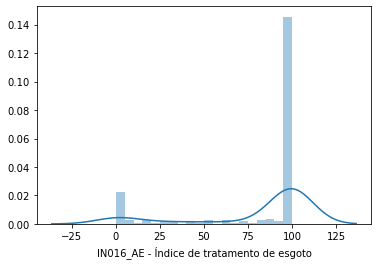

In [23]:
import numpy as np
A=df_total['IN016_AE - Índice de tratamento de esgoto']
Anan=A[~np.isnan(A)] # Remove the NaNs

sns.distplot(Anan,hist=True)

In [ ]:
sns.heatmap(df_total.isnull(), cbar=False)

In [25]:
!pip install missingno

<AxesSubplot:>

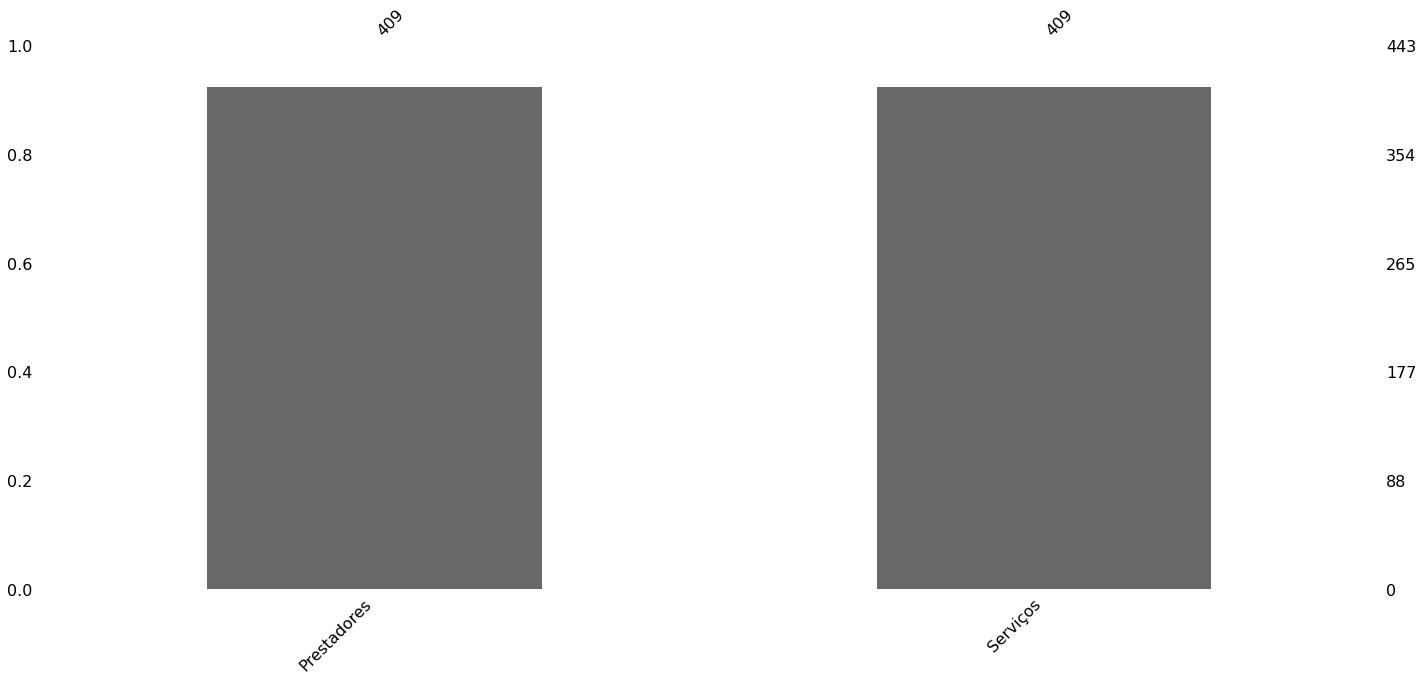

In [29]:
import missingno as msno

msno.bar(df_total[['Prestadores',
 'Serviços']])

In [45]:
df_total.drop('Paricipante do SNIS', axis=1, inplace=True)

df_total['Participante do SNIS'] = np.empty(443, np.str)

In [46]:
df_total.head()

,ibge6,Município,Estado,Ano de Referência,Prestadores,Serviços,G06A - População urbana residente do(s) município(s) com abastecimento de água,G06B - População urbana residente do(s) município(s) com esgotamento sanitário,"G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE","G12B - População total residente do(s) município(s) com esgotamento sanitário, segundo o IBGE",...,UF,REGIAO_TURISTICA,MUNICIPIO,QUANTIDADE_EMPREGOS,QUANTIDADE_ ESTABELECIMENTOS,QUANTIDADE_VISITAS_ESTIMADAS_ INTERNACIONAL,QUANTIDADE_VISITAS_ESTIMADAS_ NACIONAL,ARRECADACAO,CLUSTER,Participante do SNIS
0,150010,Abaetetuba,PA,2018,[15014000] Companhia de Saneamento do Pará - C...,Água | Res. Sólidos,91934.0,NaN,156292.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,150030,Afuá,PA,2018,[15014000] Companhia de Saneamento do Pará - C...,Água | Res. Sólidos,10511.0,NaN,38863.0,NaN,...,PA,Região Turística das Florestas do Marajó,Afuá,0.0,0.0,0.0,42336.0,0.0,D,
2,150070,Anajás,PA,2018,[15014000] Companhia de Saneamento do Pará - C...,Água,11066.0,NaN,28859.0,NaN,...,PA,Região Turística das Florestas do Marajó,Anajás,0.0,0.0,113.0,4742.0,0.0,D,
3,150080,Ananindeua,PA,2018,[15014000] Companhia de Saneamento do Pará - C...,Água e Esgoto | Res. Sólidos,524273.0,524273.0,525566.0,525566.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,150090,Augusto Corrêa,PA,2018,[15014000] Companhia de Saneamento do Pará - C...,Água | Res. Sólidos,20501.0,NaN,45516.0,NaN,...,PA,Região Turística Amazônia Atlântica Caeté,Augusto Corrêa,0.0,0.0,0.0,326.0,0.0,D,


<AxesSubplot:>

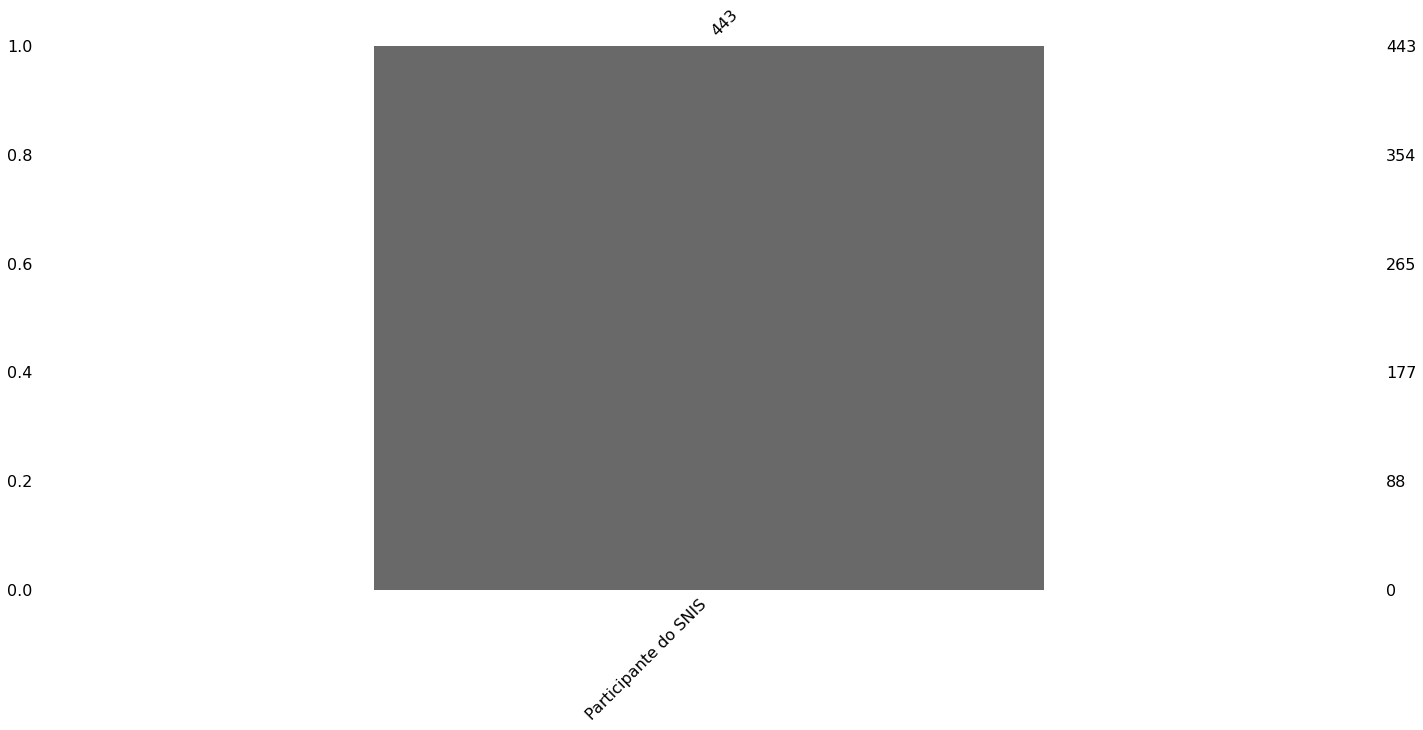

In [65]:
msno.bar(df_total[['Participante do SNIS']])

<AxesSubplot:xlabel='Participante do SNIS', ylabel='count'>

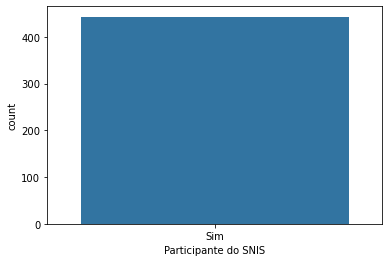

In [71]:
sns.countplot(x = 'Participante do SNIS', data = df_total)

In [113]:
df_total['Prestadores'].replace(to_replace=np.NaN, value='', inplace=True)

In [ ]:
lst2 = list(df_total['Prestadores'])
lst2

In [115]:
df_total['Participante do SNIS'] = np.where(df_total['Prestadores'] == '', 'Não', 'Sim')

<AxesSubplot:xlabel='Participante do SNIS', ylabel='count'>

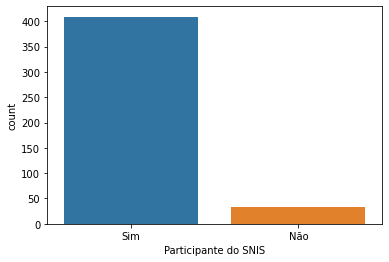

In [116]:
sns.countplot(x = 'Participante do SNIS', data = df_total)

In [117]:
df_total['Participante do SNIS'].head(20)

0     Sim
1     Sim
2     Sim
3     Sim
4     Sim
5     Não
6     Sim
7     Sim
8     Sim
9     Sim
10    Sim
11    Sim
12    Sim
13    Sim
14    Não
15    Não
16    Não
17    Não
18    Não
19    Sim
Name: Participante do SNIS, dtype: object

In [118]:
df_total.to_excel('costeiros_443_final_comSNIS.xlsx')